Our first GWP starts from here!

In [1]:
import datetime

import numpy as np
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
import yfinance as yfin
import quandl as qd
from scipy import stats
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

yfin.pdr_override()

Scenario 1: money at a fixed rate for an unsecured purchase.

Data: credit card balances due each month for assessing default risk.
Data Type: Economic
Data Processing: Percentages
Data Frequency: Monthly
Data Class: Credit
Data Source: Federal Reserve
Data Variety: Credit card delinquency rates

In [2]:
# File path is unique, it is where you save the file on you own PC, so make sure change it!
file_path = 'D:\Job hunting\Learning materials\WQ Financial Engineering\Financial Data\GWP_1\data'
file_name = 'FRB_CHGDEL.csv'
delinquency_rate = pd.read_csv(f"{file_path}\\{file_name}").iloc[6:, 0:2].reset_index(drop = True)
delinquency_rate.columns = ['Period', 'Rate']
print(delinquency_rate)

     Period  Rate
0    1985Q2  4.92
1    1985Q3  4.91
2    1985Q4  4.77
3    1986Q1  4.86
4    1986Q2  4.74
..      ...   ...
149  2022Q3  1.20
150  2022Q4  1.19
151  2023Q1  1.21
152  2023Q2  1.26
153  2023Q3  1.33

[154 rows x 2 columns]


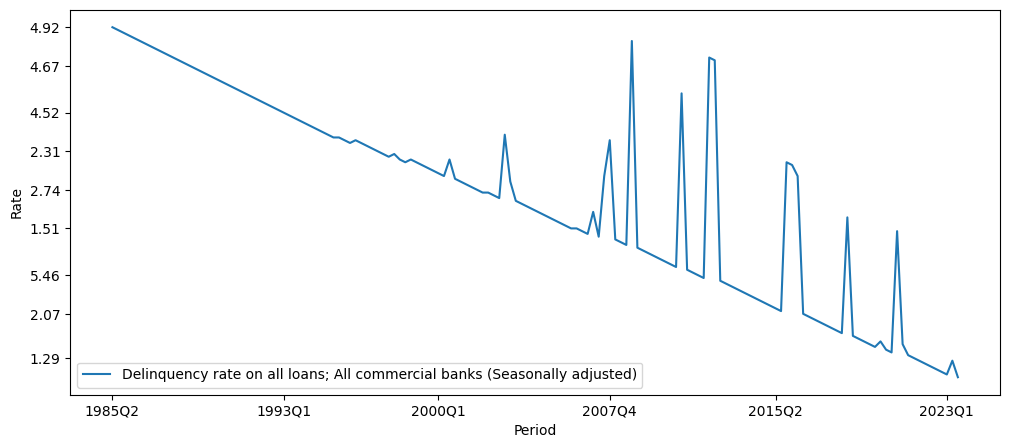

In [3]:
plt.figure(figsize = (12, 5))
sns.lineplot(x = 'Period',
            y = 'Rate',
            data = delinquency_rate,
            label = 'Delinquency rate on all loans; All commercial banks (Seasonally adjusted)')
ax = plt.gca()  # Get the current Axes instance
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.yaxis.set_major_locator(mdates.AutoDateLocator())


The graph displays the delinquency rate on all loans from commercial banks in the US from 1985 to 2023. It shows a long-term decline from 1985 to the early 2000s, followed by volatile spikes indicative of economic stress, particularly around 2007-2008. These spikes correspond to periods likely associated with financial crises or recessions. After each spike, there is a recovery, with rates falling back down. The latest data point indicates a current downward trend in delinquency rates.

Scenario 2: money at a floating rate for a secured purchase

Data: monthly home values for assessing collateral risk of a mortgage
Data Type: Economic
Data Processing: Percentage
Data Frequency: Monthly
Data Class: Real Estate
Data Source: Federal Agencies
Data Variety: Home price indexes

In [4]:
file_name = 'HPI_master.csv'
house_price = pd.read_csv(f"{file_path}\\{file_name}")
house_price = house_price[house_price['frequency'] == 'monthly'][['yr', 'index_sa']]
house_price.columns = ['Year', 'Price index']
print(house_price)

      Year  Price index
0     1991       100.00
1     1991       100.95
2     1991       100.92
3     1991       100.98
4     1991       101.36
...    ...          ...
3935  2023       405.84
3936  2023       409.17
3937  2023       412.13
3938  2023       414.94
3939  2023       416.26

[3940 rows x 2 columns]


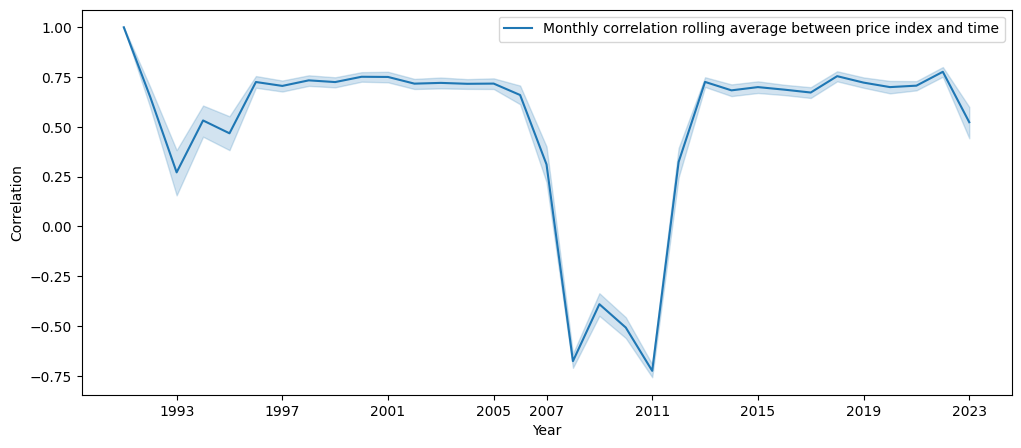

In [5]:
house_price['Correlation'] = house_price['Year'].rolling(12).corr(house_price['Price index'])
plt.figure(figsize = (12, 5))
sns.lineplot(x = 'Year',
            y = 'Correlation',
            data = house_price,
            label = 'Monthly correlation rolling average between price index and time')
ax = plt.gca()  # Get the current Axes instance
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

The graph shows the rolling average of monthly correlation between a price index and time from 1993 to 2023. There's generally a positive correlation, with two significant drops into negative territory, suggesting periods where time and the price index moved inversely. The most notable drop occurs around 2007, likely indicating a market anomaly or crisis. The correlation recovers after each drop, returning to positive values. The trend appears to stabilize in the latter years, maintaining a consistently positive correlation.

Scenario 3: money at a fixed rate for a business for a construction loan

Data:  Real Estate Loans: Commercial Real Estate Loans: Construction and Land Development Loans, All Commercial Banks (CLDACBW027SBOG)
Data Type: Loan Documents
Data Processing: Loan Agreement Details (rate, duration, amortization, appraisal price, collateral)
Data Frequency: Monthly Loan  Statement & Construction Progress Report
Data Class: Financial Contract
Data Source: Loan Documentation, Records from Banks/ Financial Institution, City Records of Permit Approval / Contractor License & Insurance Information
Data Variety: Actual Data, Observed Data

In [6]:
file_name = 'CLDACBW027SBOG.csv'
real_estate_loan = pd.read_csv(f"{file_path}\\{file_name}")
real_estate_loan.rename(columns = {'CLDACBW027SBOG': 'Loan'}, inplace = True)
real_estate_loan['Change'] = real_estate_loan['Loan'].pct_change()
real_estate_loan = real_estate_loan.fillna(0)
print(real_estate_loan)

           DATE      Loan    Change
0    2015-01-07  223.6501  0.000000
1    2015-01-14  224.3909  0.003312
2    2015-01-21  225.2721  0.003927
3    2015-01-28  226.1358  0.003834
4    2015-02-04  226.9754  0.003713
..          ...       ...       ...
464  2023-11-29  488.4771  0.000028
465  2023-12-06  488.4803  0.000007
466  2023-12-13  487.5857 -0.001831
467  2023-12-20  488.9183  0.002733
468  2023-12-27  487.5101 -0.002880

[469 rows x 3 columns]


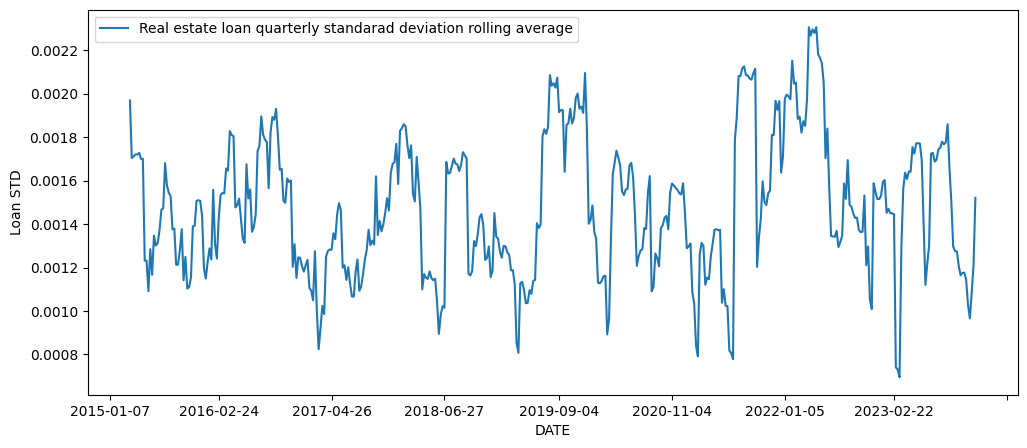

In [7]:
real_estate_loan['Loan STD'] = real_estate_loan['Change'].rolling(12).std()
# print(real_estate_loan)
plt.figure(figsize = (12, 5))
sns.lineplot(x = 'DATE',
            y = 'Loan STD',
            data = real_estate_loan,
            label = 'Real estate loan quarterly standarad deviation rolling average')
ax = plt.gca()  # Get the current Axes instance
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

The graph shows the rolling average of the quarterly standard deviation / volatility of real estate loan amounts from January 2015 to February 2023. The standard deviation measures the variability or dispersion of loan amounts. There's a fluctuating pattern with no clear long-term trend, indicating variable volatility in real estate loan values over the period. Notable peaks suggest periods of higher variability, while troughs indicate more consistency in loan amounts. The ending point shows a decline, suggesting a decrease in variability of loan amounts most recently.

Scenario 4: publicly traded Equity

Data:  TSLA share price, AMD share price
Data Type: Stock Market Performance 
Data Processing: Market Price, 
Data Frequency: Trading Hours (Real-Time) 
Data Class: Financial Markets Data 
Data Source: Yahoo
Data Variety: Actual Data 

In [8]:
# Setting the timeframe for the data
start_date = datetime.date(2023, 1, 1)
end_date = datetime.date(2023, 12, 31)
share_price = pd.DataFrame(web.DataReader(['TSLA', 'AMD'], start_date, end_date)["Adj Close"])
share_price['TSLA return'] = share_price['TSLA'].pct_change()
share_price['AMD return'] = share_price['AMD'].pct_change()
share_price.dropna(inplace = True)

print(share_price)

[*********************100%%**********************]  2 of 2 completed

                   AMD        TSLA  TSLA return  AMD return
Date                                                       
2023-01-04   64.660004  113.639999     0.051249    0.009997
2023-01-05   62.330002  110.339996    -0.029039   -0.036035
2023-01-06   63.959999  113.059998     0.024651    0.026151
2023-01-09   67.239998  119.769997     0.059349    0.051282
2023-01-10   68.050003  118.849998    -0.007681    0.012046
...                ...         ...          ...         ...
2023-12-22  139.600006  252.539993    -0.007701   -0.002216
2023-12-26  143.410004  256.609985     0.016116    0.027292
2023-12-27  146.070007  261.440002     0.018822    0.018548
2023-12-28  148.759995  253.179993    -0.031594    0.018416
2023-12-29  147.410004  248.479996    -0.018564   -0.009075

[249 rows x 4 columns]


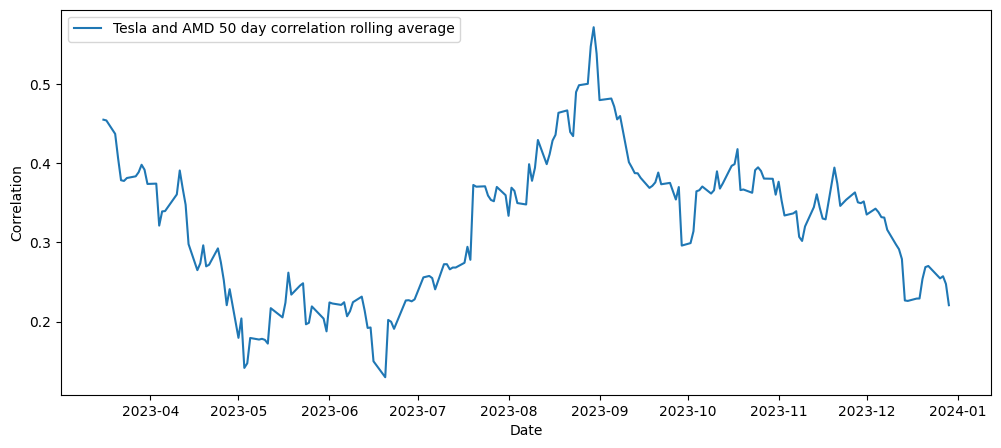

In [9]:
share_price['Correlation'] = share_price['TSLA return'].rolling(50).corr(share_price['AMD return'])
plt.figure(figsize = (12, 5))
sns.lineplot(x = 'Date',
            y = 'Correlation',
            data = share_price,
            label = 'Tesla and AMD 50 day correlation rolling average')
ax = plt.gca()  # Get the current Axes instance
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

The graph shows the 50-day rolling average correlation between Tesla and AMD stock prices from April 2023 to January 2024. The correlation starts just under 0.5 and initially trends downward, reaching a low around May 2023. It then rises sharply, peaking above 0.5 around August 2023, indicating a period where the stock prices moved in a more similar pattern. After this peak, the correlation declines, suggesting the stocks' price movements began to diverge more. By January 2024, the correlation is in a downward trend, ending lower than where it started.

Scenario 5: publicly traded bond

Data: Treasury Yield 30 Years
Data Type: Asset
Data Processing: Raw Prices
Data Frequency: Intraday, Daily
Data Class: Fixed Income
Data Source: Yahoo
Data Variety: Trade Data, Actual Data

In [10]:
# Setting the timeframe for the data
start_date = datetime.date(2023, 1, 1)
end_date = datetime.date(2023, 12, 31)

bond_price = pd.DataFrame(web.DataReader('^TYX', start_date, end_date)["Adj Close"])
bond_return = bond_price.pct_change().dropna()
bond_return = bond_return.rename(columns={"Adj Close": "Bond return"})

print(bond_return.head())

[*********************100%%**********************]  1 of 1 completed

            Bond return
Date                   
2023-01-04    -0.018752
2023-01-05    -0.005759
2023-01-06    -0.027909
2023-01-09    -0.011376
2023-01-10     0.029315


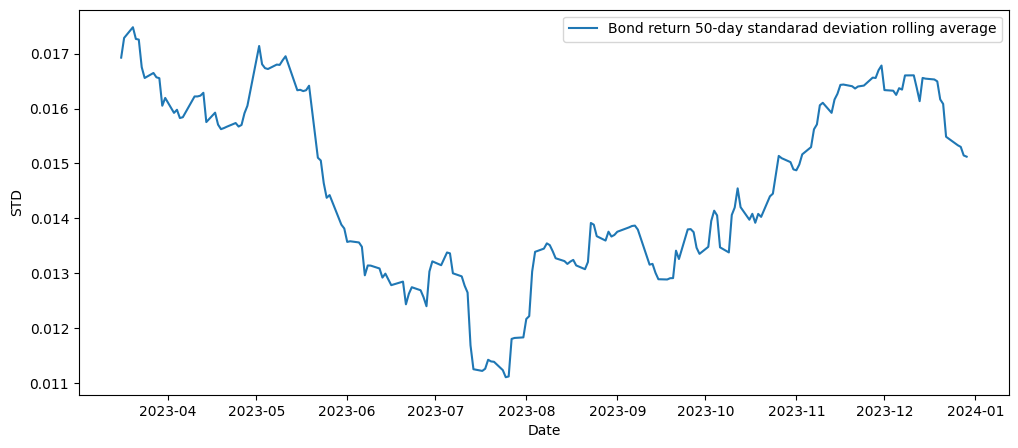

In [11]:
bond_return['STD'] = bond_return['Bond return'].rolling(50).std()
plt.figure(figsize = (12, 5))
sns.lineplot(x = 'Date',
            y = 'STD',
            data = bond_return,
            label = 'Bond return 50-day standarad deviation rolling average')
ax = plt.gca()  # Get the current Axes instance
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

The graph illustrates the 50-day rolling average of the standard deviation / volatility of bond returns from April 2023 to January 2024. The standard deviation measures the volatility of bond returns. Initially, the volatility decreases sharply, reaching a low around July 2023. From August 2023, volatility increases, suggesting a period of greater uncertainty or variability in bond returns. The chart ends with a peak, indicating an increase in volatility in January 2024 compared to the previous month.

Scenario 6: an illiquid security

Data: Home value in Wenatchee
Data Type: Asset
Data Processing: Estimated Valuations
Data Frequency: Monthly
Data Class: Real Estate
Data Source: Quandl
Data Variety: Estimated Data, Modeled Data

In [12]:
qd.ApiConfig.api_key = 'qQe_PTGQRatZoLWNRbKa'

# Home value in Wenatchee
# real_estate_indicator = qd.get_table('ZILLOW/INDICATORS')
real_estate_price = qd.get_table('ZILLOW/DATA',indicator_id=['ZALL'], region_id = '99999').sort_values(by = 'date').reset_index(drop = True)
real_estate_price['change'] = real_estate_price['value'].pct_change()
real_estate_price.dropna(inplace = True)
real_estate_price = real_estate_price[['date', 'value', 'change']]
print(real_estate_price)
# print(real_estate_indicator)

          date          value    change
1   2005-02-28  166047.000000 -0.000427
2   2005-03-31  166757.000000  0.004276
3   2005-04-30  168061.000000  0.007820
4   2005-05-31  170799.000000  0.016292
5   2005-06-30  173373.000000  0.015070
..         ...            ...       ...
222 2023-07-31  475006.583756  0.000417
223 2023-08-31  473796.644134 -0.002547
224 2023-09-30  471415.057884 -0.005027
225 2023-10-31  468537.272405 -0.006105
226 2023-11-30  465555.180963 -0.006365

[226 rows x 3 columns]


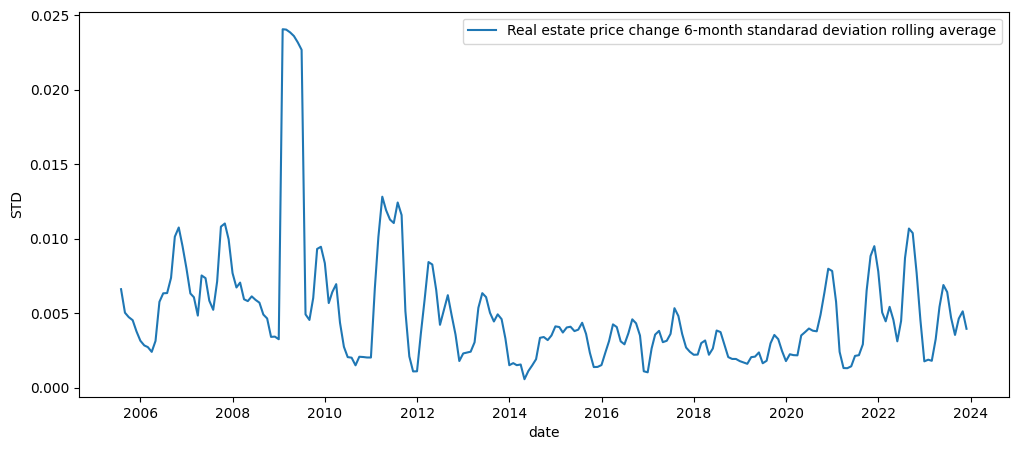

In [13]:
real_estate_price['STD'] = real_estate_price['change'].rolling(6).std()
plt.figure(figsize = (12, 5))
sns.lineplot(x = 'date',
            y = 'STD',
            data = real_estate_price,
            label = 'Real estate price change 6-month standarad deviation rolling average')
ax = plt.gca()  # Get the current Axes instance
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

The graph shows the 6-month rolling average of the standard deviation / volatility of real estate price changes from 2006 to 2024. The volatility peaks sharply around 2008, which aligns with the global financial crisis, reflecting significant uncertainty in real estate prices. Subsequent fluctuations indicate varying levels of price volatility, with notable peaks suggesting periods of higher uncertainty or market adjustments. The overall pattern does not show a clear long-term trend but does reflect periodic market instability. The graph ends with volatility on a rise, indicating increasing uncertainty in the most recent period.